In [2]:
import pandas as pd

In [3]:
redwine_data = pd.read_csv(r"C:\Users\Shrey\OneDrive\Desktop\data mining\red wine\archive\winequality-red.csv")

In [4]:
redwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
redwine_data.shape

(1599, 12)

In [6]:
redwine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
redwine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


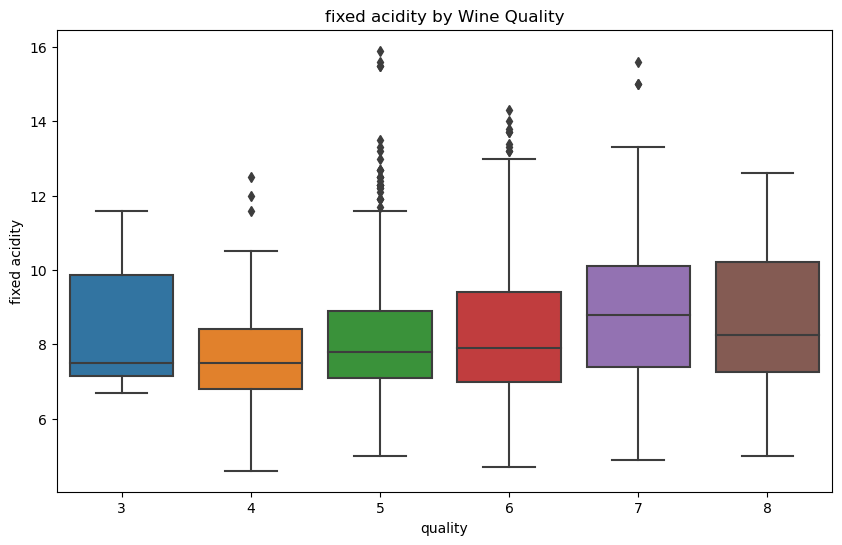

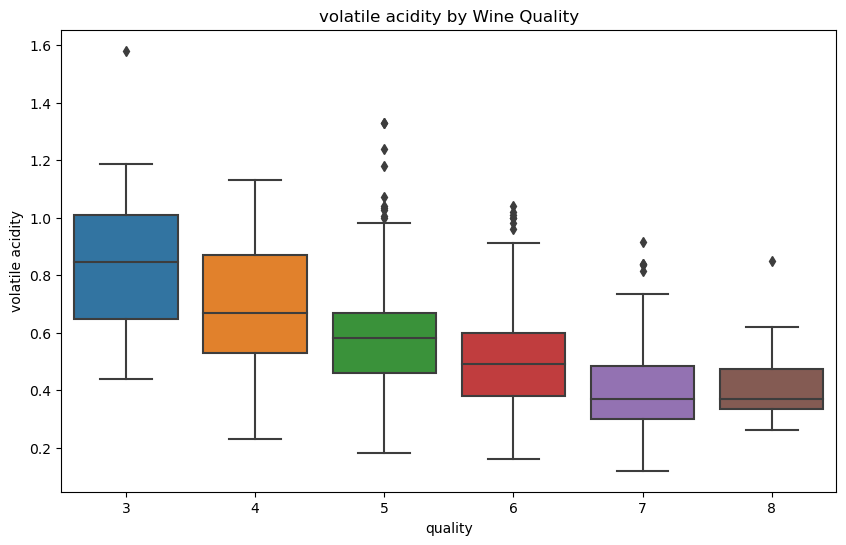

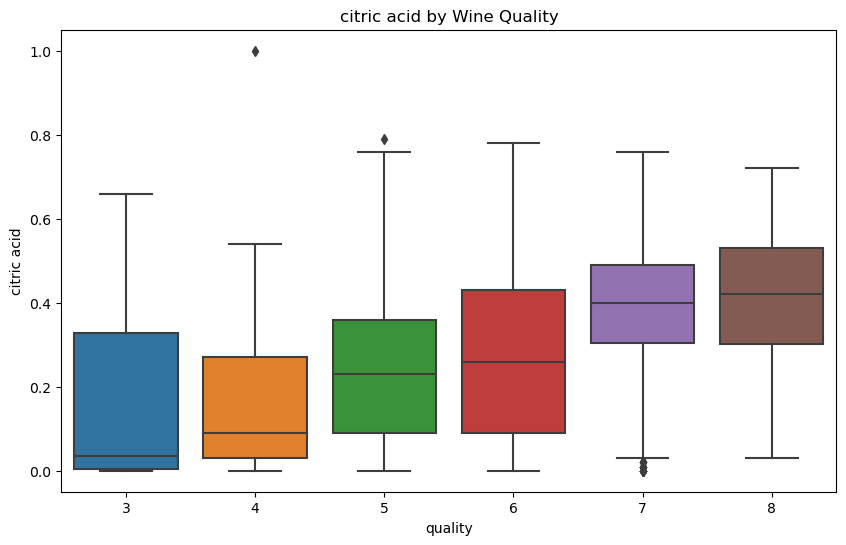

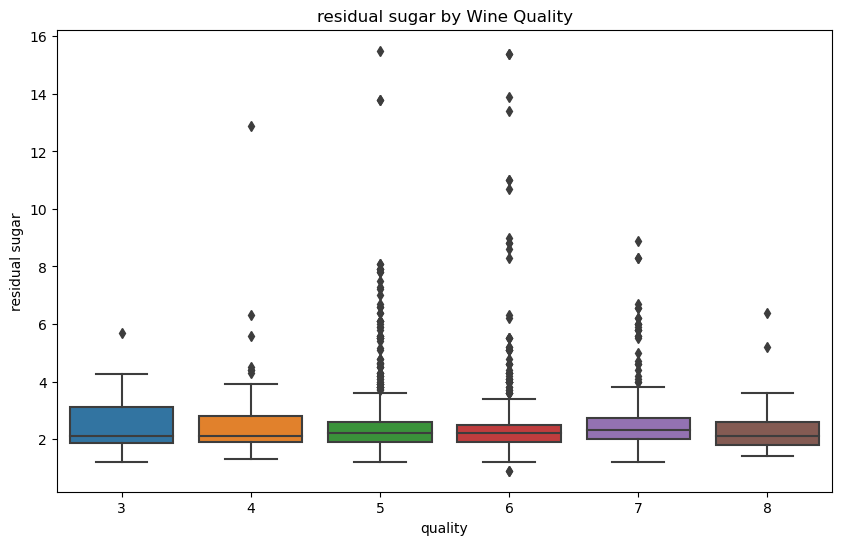

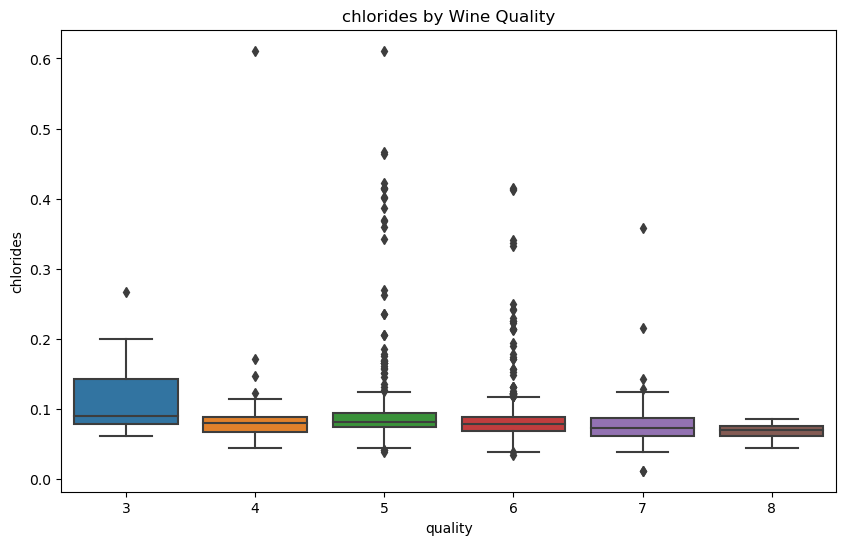

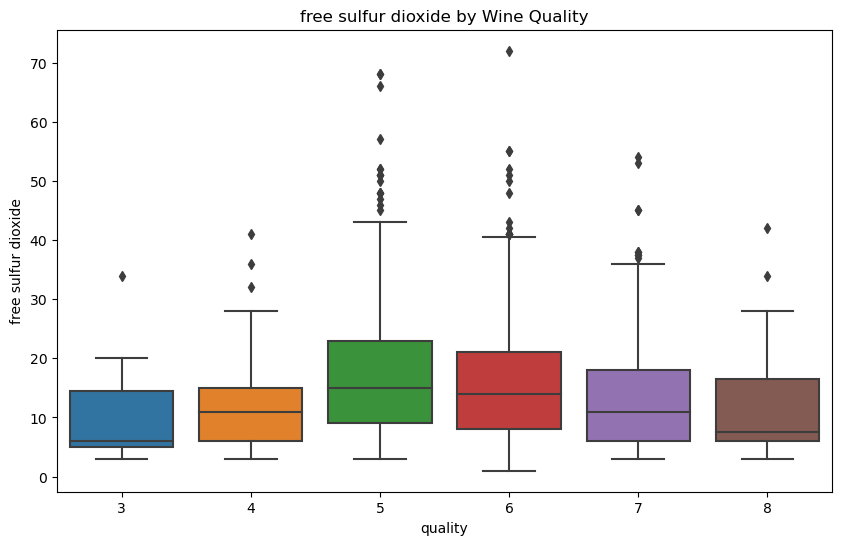

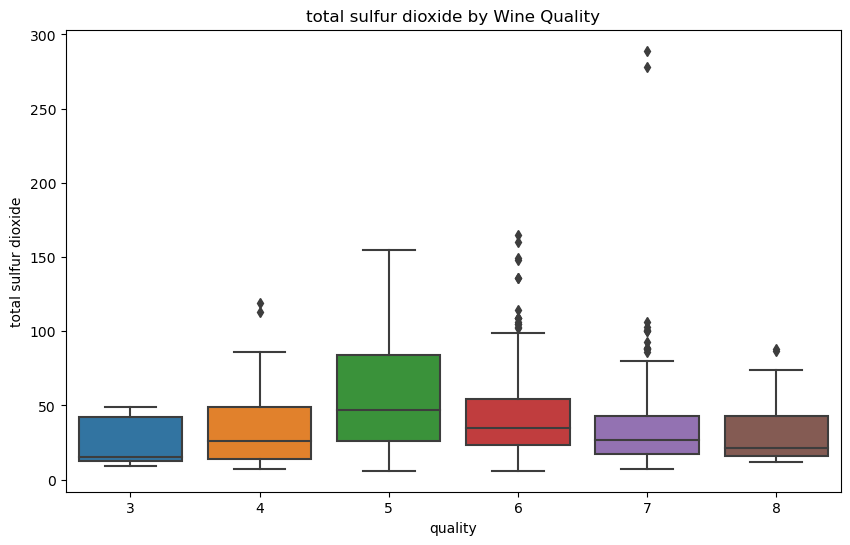

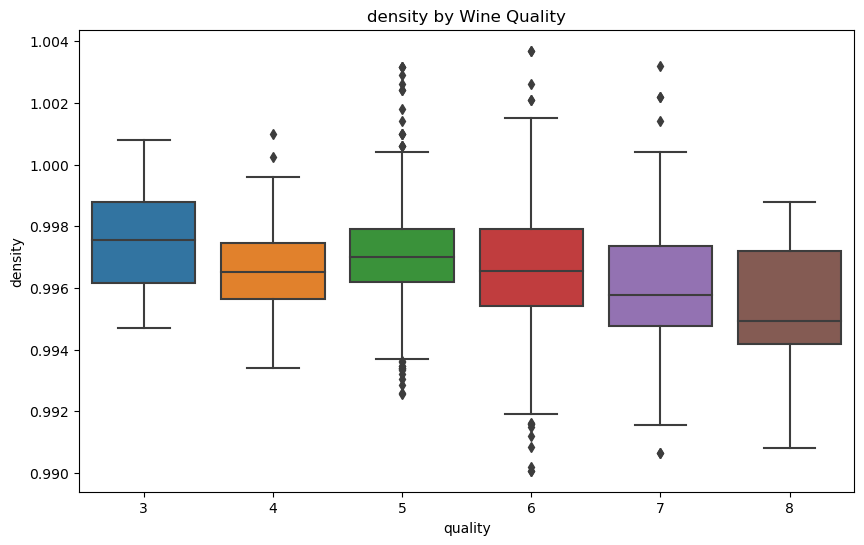

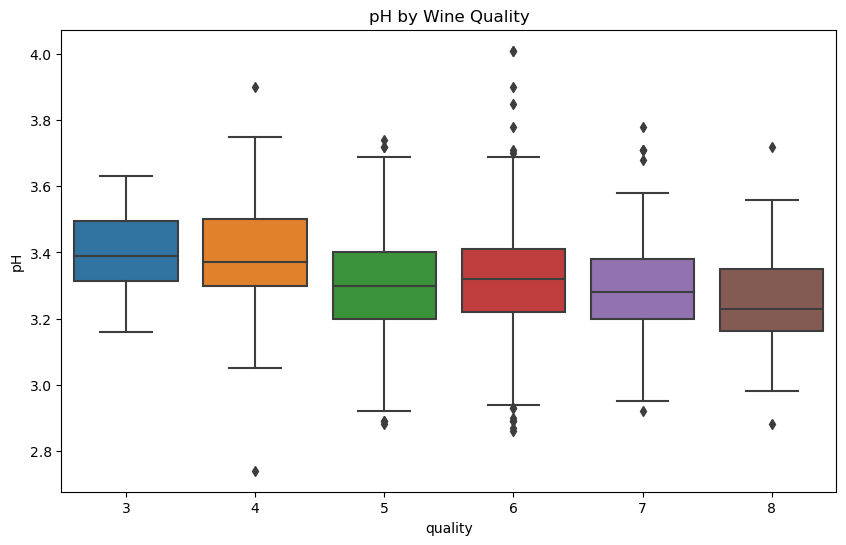

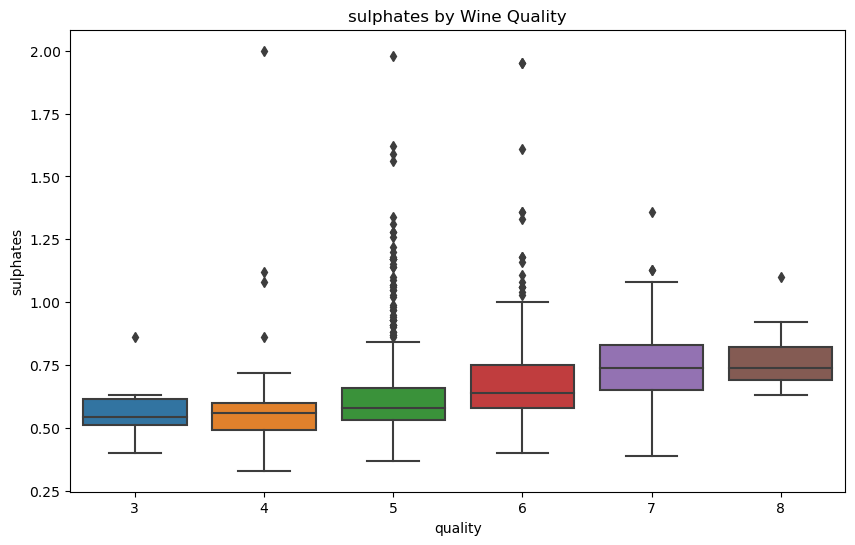

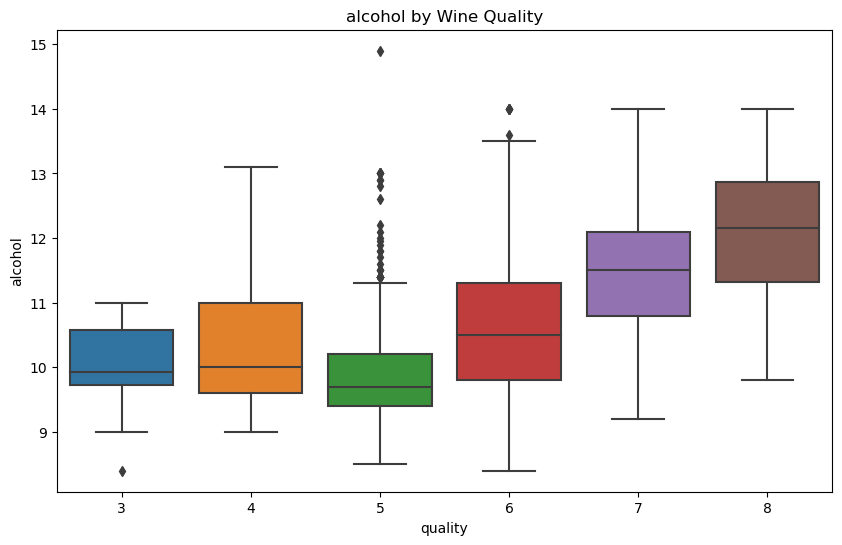

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in redwine_data.columns[:-1]:  
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quality', y=column, data=redwine_data)
    plt.title(f"{column} by Wine Quality")
    plt.show()


In [9]:
from sklearn.model_selection import train_test_split
x = redwine_data.drop('quality', axis=1)
y = redwine_data['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression(max_iter=1000000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred)) 

Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.74      0.68       195
           6       0.52      0.57      0.55       200
           7       0.41      0.20      0.27        61
           8       0.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.26      0.25      0.25       480
weighted avg       0.52      0.56      0.54       480



c:\Users\Shrey\anaconda3\python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shrey\anaconda3\python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shrey\anaconda3\python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Random Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.65
Random Forest Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.72      0.75      0.73       195
           6       0.62      0.69      0.65       200
           7       0.56      0.46      0.50        61
           8       0.50      0.17      0.25         6

    accuracy                           0.65       480
   macro avg       0.40      0.34      0.36       480
weighted avg       0.63      0.65      0.64       480



c:\Users\Shrey\anaconda3\python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shrey\anaconda3\python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shrey\anaconda3\python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(x_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(x_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb:.2f}')
print('Gradient Boosting Classification Report:')
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.63
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.18      0.26        17
           5       0.70      0.75      0.73       195
           6       0.61      0.65      0.62       200
           7       0.57      0.39      0.47        61
           8       0.25      0.17      0.20         6

    accuracy                           0.63       480
   macro avg       0.44      0.36      0.38       480
weighted avg       0.63      0.63      0.63       480



In [16]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomizedSearchCV for Random Forest
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf,
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(x_train, y_train)

# Make predictions with the best model
best_rf_model = rf_random.best_estimator_
y_pred_rf_best = best_rf_model.predict(x_test)

# Evaluate the tuned model
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print(f'Random Forest Best Model Accuracy: {accuracy_rf_best:.2f}')
print('Random Forest Best Model Classification Report:')
print(classification_report(y_test, y_pred_rf_best))

print(f'Best Parameters for Random Forest: {rf_random.best_params_}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Random Forest Best Model Accuracy: 0.65
Random Forest Best Model Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.73      0.75      0.74       195
           6       0.61      0.71      0.66       200
           7       0.56      0.39      0.46        61
           8       0.00      0.00      0.00         6

    accuracy                           0.65       480
   macro avg       0.32      0.31      0.31       480
weighted avg       0.62      0.65      0.63       480

Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


c:\Users\Shrey\anaconda3\python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shrey\anaconda3\python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shrey\anaconda3\python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomizedSearchCV for Gradient Boosting
gb_random = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid_gb,
                               n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
gb_random.fit(x_train, y_train)

# Make predictions with the best model
best_gb_model = gb_random.best_estimator_
y_pred_gb_best = best_gb_model.predict(x_test)

# Evaluate the tuned model
accuracy_gb_best = accuracy_score(y_test, y_pred_gb_best)
print(f'Gradient Boosting Best Model Accuracy: {accuracy_gb_best:.2f}')
print('Gradient Boosting Best Model Classification Report:')
print(classification_report(y_test, y_pred_gb_best))

print(f'Best Parameters for Gradient Boosting: {gb_random.best_params_}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Gradient Boosting Best Model Accuracy: 0.64
Gradient Boosting Best Model Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.72      0.76      0.74       195
           6       0.61      0.64      0.62       200
           7       0.55      0.44      0.49        61
           8       0.25      0.17      0.20         6

    accuracy                           0.64       480
   macro avg       0.35      0.34      0.34       480
weighted avg       0.62      0.64      0.62       480

Best Parameters for Gradient Boosting: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}


In [22]:
# Adjusting the target variable so the classes start from 0
y_train_adjusted = y_train - y_train.min()
y_test_adjusted = y_test - y_test.min()

# Training the model with the adjusted target
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train_adjusted)

# Predicting and calculating accuracy
y_pred_xgb = xgb_model.predict(x_test)
accuracy_xgb = accuracy_score(y_test_adjusted, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')
print(classification_report(y_test_adjusted, y_pred_xgb))


XGBoost Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.17      0.06      0.09        17
           2       0.75      0.79      0.77       195
           3       0.65      0.69      0.67       200
           4       0.59      0.49      0.54        61
           5       0.25      0.17      0.20         6

    accuracy                           0.68       480
   macro avg       0.40      0.37      0.38       480
weighted avg       0.66      0.68      0.66       480



c:\Users\Shrey\anaconda3\python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shrey\anaconda3\python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Shrey\anaconda3\python3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
x = redwine_data.drop('quality', axis=1)
y = redwine_data['quality']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Apply SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

# Train the model on the balanced dataset
model = RandomForestClassifier(random_state=42)
model.fit(x_train_sm, y_train_sm)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.23      0.35      0.28        17
           5       0.75      0.68      0.71       195
           6       0.68      0.62      0.65       200
           7       0.51      0.64      0.57        61
           8       0.22      0.33      0.27         6

    accuracy                           0.63       480
   macro avg       0.40      0.44      0.41       480
weighted avg       0.66      0.63      0.64       480

